# Torchvision Built-in datasets

Torchvision provides many built-in datasets in the `torchvision.datasets` module, as well as utility classes for building your own datasets.

All datasets are subclasses of `torch.utils.data.Dataset` i.e, they have `__getitem__` and `__len__` methods implemented. Hence, they can all be passed to a `torch.utils.data.DataLoader` which can load multiple samples in parallel using torch.multiprocessing workers. For example:

In [1]:
import os
import torch
import torchvision
import matplotlib.pyplot as plt


## Example: MNIST

In [2]:
data_folder = '../data/'
dataset_name = 'MNIST'
dataset_folder = os.path.join(data_folder, dataset_name)

In [3]:
if os.path.exists(dataset_folder):
    print(f"Using existing dataset folder: {dataset_folder}")
    mnist_data = torchvision.datasets.MNIST(data_folder, 
                                            train=True,
                                            transform=torchvision.transforms.ToTensor())
    # NOTE:
    # transform=torchvision.transforms.ToTensor(): Converts the PIL Image or NumPy array to a 
    # torch.FloatTensor and scales the pixel values to the range [0.0, 1.0].
else:
    print(f"Dataset folder '{dataset_folder}' does not exist. Downloading dataset...")
    mnist_data = torchvision.datasets.MNIST(data_folder, 
                                            train=True,
                                            transform=torchvision.transforms.ToTensor(), 
                                            download=True)

Dataset folder '../data/MNIST' does not exist. Downloading dataset...
Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [4]:
print(mnist_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
# Get the first image and its label
image, label = mnist_data[0] 

print("Image shape:", image.shape)
print("Label:", label)

Image shape: torch.Size([1, 28, 28])
Label: 5


Image 0 - Label: 5
Image 1 - Label: 0
Image 2 - Label: 4
Image 3 - Label: 1
Image 4 - Label: 9
Image 5 - Label: 2
Image 6 - Label: 1
Image 7 - Label: 3
Image 8 - Label: 1
Image 9 - Label: 4


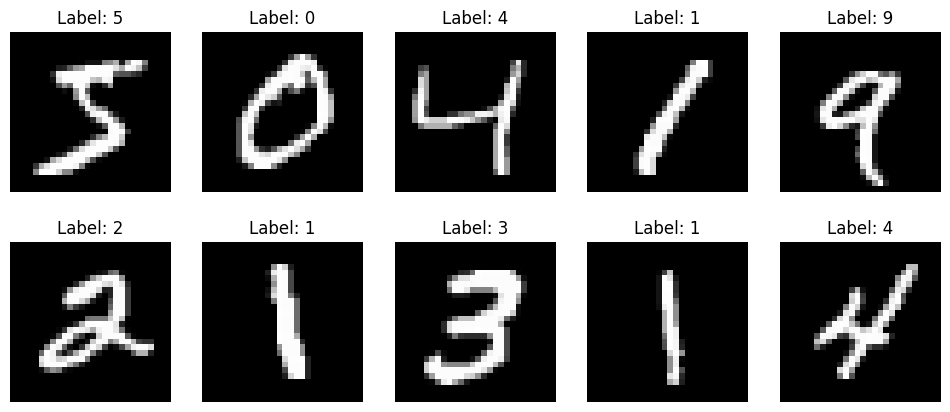

In [6]:
# Plotting the first 10 images in the dataset

fig, ax = plt.subplots(2, 5, figsize=(12, 5))

for i in range(10):
    image, label = mnist_data[i]
    print(f"Image {i} - Label: {label}")
    ax[i // 5, i % 5].imshow(image.squeeze(), cmap='gray')
    ax[i // 5, i % 5].set_title(f"Label: {label}")
    ax[i // 5, i % 5].axis('off')
plt.show()


# Exercises

Explore the list of available datasets in `Torchvision`:

https://docs.pytorch.org/vision/stable/datasets.html

Choos one datased and inspect / visualize it's content:
- How many examples?
- What is the dimentionality of ech input example?
- What are the lables?
- What tipe of study can you do with this dataset?
